In [5]:
%matplotlib inline


GroupLasso for linear regression
================================

A sample script for group lasso regression


Setup
-----



In [6]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score

from group_lasso import GroupLasso

np.random.seed(0)
GroupLasso.LOG_LOSSES = True

Set dataset parameters
----------------------



In [7]:
group_sizes = [np.random.randint(10, 20) for i in range(50)]
active_groups = [np.random.randint(2) for _ in group_sizes]
groups = np.concatenate(
    [size * [i] for i, size in enumerate(group_sizes)]
).reshape(-1, 1)
num_coeffs = sum(group_sizes)
num_datapoints = 10000
noise_std = 20

Generate data matrix
--------------------



In [8]:
X = np.random.standard_normal((num_datapoints, num_coeffs))

Generate coefficients
---------------------



In [9]:
w = np.concatenate(
    [
        np.random.standard_normal(group_size) * is_active
        for group_size, is_active in zip(group_sizes, active_groups)
    ]
)
w = w.reshape(-1, 1)
true_coefficient_mask = w != 0
intercept = 2

Generate regression targets
---------------------------



In [10]:
y_true = X @ w + intercept
y = y_true + np.random.randn(*y_true.shape) * noise_std

View noisy data and compute maximum R^2
---------------------------------------



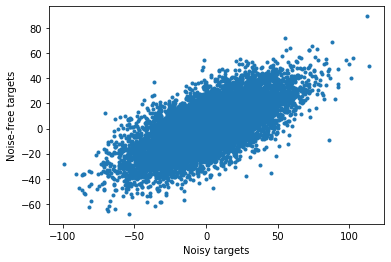

In [11]:
plt.figure()
plt.plot(y, y_true, ".")
plt.xlabel("Noisy targets")
plt.ylabel("Noise-free targets")
# Use noisy y as true because that is what we would have access
# to in a real-life setting.
R2_best = r2_score(y, y_true)

Generate estimator and train it
-------------------------------



In [12]:
gl = GroupLasso(
    groups=groups,
    group_reg=5,
    l1_reg=0,
    frobenius_lipschitz=True,
    scale_reg="inverse_group_size",
    subsampling_scheme=1,
    supress_warning=True,
    n_iter=1000,
    tol=1e-3,
)
gl.fit(X, y)

GroupLasso(fit_intercept=True, frobenius_lipschitz=True, group_reg=5,
           groups=array([[ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 2],
       [ 2],
       [ 2],
       [ 2],
       [ 2],
       [ 2],
       [ 2],
       [ 2],
       [ 2],
       [ 2],
       [ 2],
       [ 2],
       [ 2],
       [ 3],
       [ 3],
       [ 3],
       [ 3],
       [ 3],
       [ 3],
       [ 3],
       [ 3],
       [ 3],
       [ 3],
       [ 3],
       [ 3],
       [ 3],
       [ 4],
       [ 4],
       [ 4],
       [ 4],
       [ 4],
       [ 4],
       [ 4],
       [ 4],
       [ 4],
       [ 4],
       [ 4],
       [ 4],
       [ 4],
       [ 4],
       [ 4],
       [ 4],
       [...
       [47],
       [47],
   

Extract results and compute performance metrics
-----------------------------------------------



In [13]:
# Extract info from estimator
yhat = gl.predict(X)
sparsity_mask = gl.sparsity_mask_
w_hat = gl.coef_

# Compute performance metrics
R2 = r2_score(y, yhat)

# Print results
print(f"Number variables: {len(sparsity_mask)}")
print(f"Number of chosen variables: {sparsity_mask.sum()}")
print(f"R^2: {R2}, best possible R^2 = {R2_best}")

Number variables: 720
Number of chosen variables: 313
R^2: 0.29097931452380443, best possible R^2 = 0.46262785225190173


Visualise regression coefficients
---------------------------------



X shape: (10000, 720)
True intercept: 2
Estimated intercept: [2.08271211]


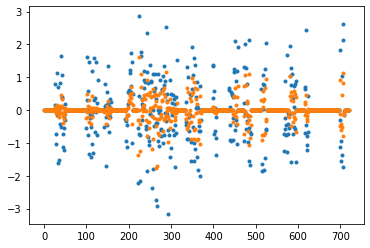

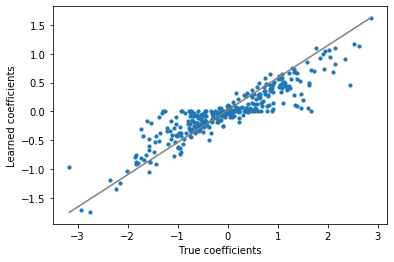

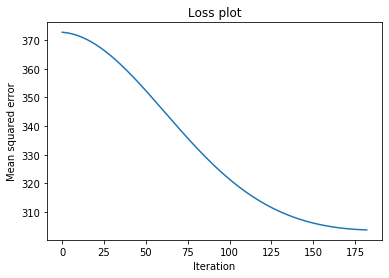

In [14]:
plt.figure()
plt.plot(w, ".", label="True weights")
plt.plot(w_hat, ".", label="Estimated weights")

plt.figure()
plt.plot([w.min(), w.max()], [w_hat.min(), w_hat.max()], "gray")
plt.scatter(w, w_hat, s=10)
plt.ylabel("Learned coefficients")
plt.xlabel("True coefficients")

plt.figure()
plt.plot(gl.losses_)
plt.title("Loss plot")
plt.ylabel("Mean squared error")
plt.xlabel("Iteration")

print("X shape: {X.shape}".format(X=X))
print("True intercept: {intercept}".format(intercept=intercept))
print("Estimated intercept: {intercept}".format(intercept=gl.intercept_))
plt.show()